In [50]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


### Downloading Data

In [51]:
ticker = yf.Ticker('ITC.NS')
data = ticker.history(period="3mo")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-20 00:00:00+05:30,384.700012,387.500000,381.299988,384.049988,7804976,0.0,0.0
2023-02-21 00:00:00+05:30,385.000000,385.899994,381.700012,382.250000,8259574,0.0,0.0
2023-02-22 00:00:00+05:30,382.000000,384.899994,380.000000,383.850006,8961077,0.0,0.0
2023-02-23 00:00:00+05:30,384.450012,394.000000,383.100006,387.600006,18830592,0.0,0.0
2023-02-24 00:00:00+05:30,389.000000,389.000000,381.000000,385.100006,12910220,0.0,0.0


### Calculating SMA on 5-days intervals

In [52]:
SMA=np.zeros(len(data))
for i in range(len(data)-4):
      close = data.iloc[i:i+5, data.columns.get_loc('Close')]
      SMA[i+4] = close.mean()
      if SMA[i]==0:
            SMA[i]=None

In [53]:
SMA

array([         nan,          nan,          nan,          nan,
       384.57000122, 384.2000061 , 383.09000854, 382.06000977,
       379.6500061 , 379.62000732, 380.81000366, 383.95      ,
       385.70999756, 388.2       , 387.93999634, 386.25      ,
       383.65      , 382.44000244, 379.95      , 378.97999878,
       378.42999878, 378.1       , 377.93999634, 378.57000122,
       378.8500061 , 379.41000366, 380.41000366, 380.98000488,
       381.02000122, 382.25999756, 383.77999878, 384.93999634,
       387.43999634, 390.36999512, 392.20999756, 394.76999512,
       396.75999756, 397.30999756, 398.65999756, 401.18999634,
       402.9       , 405.50999756, 408.20999756, 411.35      ,
       414.80999756, 417.95999756, 421.07999878, 423.55      ,
       426.1       , 427.28000488, 427.15      , 426.79000244,
       425.95      , 424.29000244, 423.55999756, 423.59000244,
       424.04000244, 423.9000061 , 423.78000488])

### Calculating EMA

In [54]:
s = 2
t = 5
EMA = np.zeros(len(data))
for i in range(len(data)):
    if i==0:
        EMA[i] = data['Close'][0]
    else:
        EMA[i] = (EMA[i-1]*(1-(s/(1+t))))+(data['Close'][i]*(s/(1+t)))

In [55]:
EMA

array([384.04998779, 383.44999186, 383.58332994, 384.922222  ,
       384.98148337, 384.05432631, 381.60288828, 380.63526292,
       378.94017121, 380.94345154, 383.34563233, 386.36375285,
       386.7425019 , 387.16166793, 385.99110992, 383.89407735,
       382.39604953, 382.08070376, 379.90379844, 379.53586155,
       378.67391177, 378.36594118, 379.12729209, 378.98486546,
       379.38991438, 379.50994292, 380.58996194, 381.55997463,
       380.67331439, 382.58220756, 384.17147374, 385.63097842,
       389.08731895, 390.57487523, 392.24991885, 394.8832772 ,
       396.08885147, 396.97590098, 398.08392992, 401.47261994,
       403.8817507 , 406.43782973, 408.37521982, 410.91681321,
       415.79453807, 418.67969612, 421.50312871, 422.53542117,
       424.60694745, 426.88796904, 425.85864195, 425.68909667,
       423.92606241, 422.76737901, 424.44491527, 424.27994758,
       425.38663376, 423.49109324, 422.27739753])

### Plotting graphs

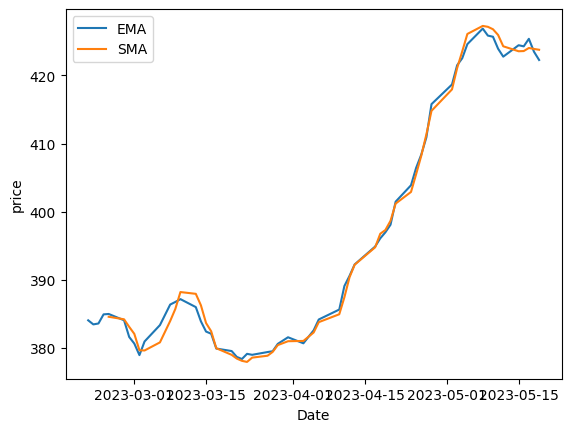

In [56]:
plt.plot(data.index,EMA,label='EMA')
plt.plot(data.index,SMA,label='SMA')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()